<a href="https://colab.research.google.com/github/RodrigoMntm/Fenomenos-Bioelectricos/blob/main/FBAct_1_Programacion_simbolica_RESM_1966542.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulacion del potencial de GHK en lenguaje simbolico matematico

Mediante este laboratorio descubrira la deficion de variables matematicas en lenguaje simbolico para introducir las ecuaciones y funciones en el tiempo que permiten calcular el potencial de Nernst y el potencial de Goldman-Hodgkin-Katz.

La actividad consiste en escribir de manera correcta el valor de la variable o de la funcion faltante dentro de una celda remplazando el valor `None`. Ejemplo:

In [54]:
K_o = 125
K_i = 30

# Definal el valor de relacion de concentracion de potacio extracelular
# respecto a la concentracion intracelular del mismo ion.

dKio = K_o/K_i
dKio

4.166666666666667

Resultado esperado: `dKio = K_o/K_i`

Tabla 1 de valores de concentracion.

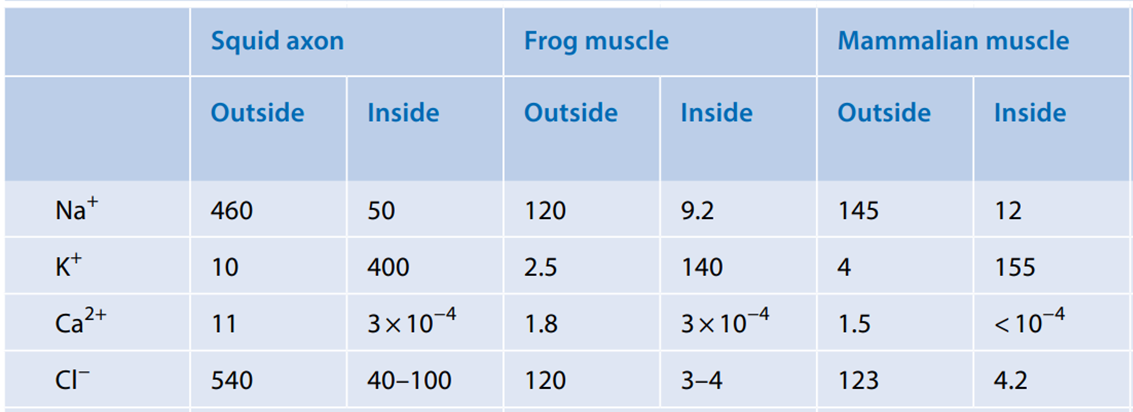

**Nota**: considere Cl=100 y Cl=4 para el calamar y la rana respectivamente.

## 1. Instalacion de la libreria SymPy

La celda solo instalara la libreria si es necesario

In [55]:
try:
  import sympy
  print('SymPy fue importado con exito')
except:
  !pip install sympy

SymPy fue importado con exito


## 2. Importar modulos requeridos para definicion de variables simbolicas

Seleccionar alguna de las 2 opciones disponibles:

    * Symbol <- permite definir solo una variable simbolica matematica
    * symbols <- permite definir varias variables simbolicas a la *vez*

In [56]:
from sympy import Symbol
from sympy import log

Definicion de variables simples y de metodo de representacion

In [57]:
x = Symbol('x')
x

x

In [58]:
y = Symbol('y')
y

y

In [59]:
z = x**2+y**3+3*x*y+2*y-3*x

In [60]:
z

x**2 + 3*x*y - 3*x + y**3 + 2*y

Solucion de operaciones con variables simbolicas mediante la asignacion de valores numericos a las variables simbolicas matematicas

In [61]:
z = 3*x+y
z

3*x + y

In [62]:
z.subs({x:3,y:1})

10

## 3. Simulacion del potencial de Nernst del Potasio del musculo de una rana

Definicion de las constantes de la ecuacion

In [63]:
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

Definicion de variables para calcular el potencial de Nernst del K

In [64]:
K_in = Symbol('K_in')
K_out = Symbol('K_out')
K_z = Symbol('K_z')

Definicion de la funcion del potencial de Nernst del K

In [65]:
V_K  = - ((R * T) / (K_z * F)) * log(K_in / K_out)

In [66]:
V_K

-R*T*log(K_in/K_out)/(F*K_z)

Resultado esperado.


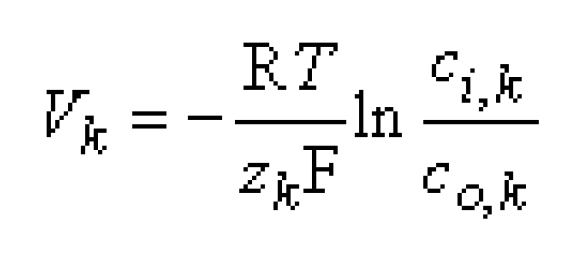

Asignacion de valores numericos a las variables de concentracion de K

In [67]:
#R = 8.314   Constante de los gases en J/(mol*K)
#T = 310.15  37°C en Kelvin
#F = 96485   Constante de Faraday en C/mol

#K_in = 140  Valor obtenido de la tabla (K+)
#K_out = 2.5 Valor obtenido de la tabla (K+)
#K_z = 1     Carga del ion potasio (K+)
V_K_valor = V_K.subs({R:8.314,T:310.15,F:96485,K_in:140,K_out:2.5,K_z:1})

In [68]:
V_K_valor

-0.107578586751234

Obtenga el potencial de Nernst del Sodio y del Cloro del musculo de rana con los datos de la Tabla 1.

Recuerde definir las variables necesarias, mostrar la ecuacion en lenguaje simbolico en una celda, y el resultado de la operacion en la siguiente celda.

In [69]:
#Definicion de las constantes de la ecuacion
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

#Definicion de variables para calcular el potencial de Nernst del K
Na_in = Symbol('Na_in')
Na_out = Symbol('Na_out')
Na_z = Symbol('Na_z')


V_Na = - ((R * T) / (Na_z * F)) * log(Na_in / Na_out)
V_Na

-R*T*log(Na_in/Na_out)/(F*Na_z)

In [70]:
#R = 8.314   Constante de los gases en J/(mol*K)
#T = 310.15  37°C en Kelvin
#F = 96485   Constante de Faraday en C/mol

#Na_in = 9.2  Valor obtenido de la tabla (Na+)
#Na_out = 120 Valor obtenido de la tabla (Na+)
#Na_z = 1     Carga del ion sodio (Na+)

V_Na_valor = V_Na.subs({R:8.314,T:310.15,F:96485,Na_in:9.2,Na_out:120,Na_z:1})
V_Na_valor

0.0686381818213716

In [71]:
#Definicion de las constantes de la ecuacion
R = Symbol('R')
T = Symbol('T')
F = Symbol('F')

#Definicion de variables para calcular el potencial de Nernst del K
Cl_in = Symbol('Cl_in')
Cl_out = Symbol('Cl_out')
Cl_z = Symbol('Cl_z')

V_Cl = - ((R * T) / (Cl_z * F)) * log(Cl_in / Cl_out)
V_Cl

-R*T*log(Cl_in/Cl_out)/(Cl_z*F)

In [72]:
#R = 8.314   Constante de los gases en J/(mol*K)
#T = 310.15  37°C en Kelvin
#F = 96485   Constante de Faraday en C/mol

#Cl_in = 4  Valor obtenido de la tabla (Cl-)
#Cl_out = 120 Valor obtenido de la tabla (Cl-)
#Cl_z = -1     Carga del ion sodio (Cl-)

V_Cl_valor = V_Cl.subs({R:8.314,T:310.15,F:96485,Cl_in:4,Cl_out:120,Cl_z:-1})
V_Cl_valor

-0.0267252640306783*log(30)

## 4. Definicion de la ecuacion del potencial de GHK

Utilice los siguientes valores de permeabilidad para simular el potencial de GHK de un:

Axon de calamar:
* P_Na=0.04
* P_K=1
* P_Cl=0.45

Musculo de rana
* P_Na=2*(10^(-8))
* P_K=2*(10^(-6))
* P_Cl=4*(10^(-6))

Musculo de un mamifero
* P_Na=0.04
* P_K=1
* P_Cl=0.45



In [73]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de calamar
#R = 8.314   Constante de los gases en J/(mol*K)
#T = 310.15  37°C en Kelvin
#F = 96485   Constante de Faraday en C/mol

#K_in = 400  Valor obtenido de la tabla (K+)
#K_out = 10  Valor obtenido de la tabla (K+)
#K_z = 1     Carga del ion potasio (K+)

#Na_in = 50  Valor obtenido de la tabla (Na+)
#Na_out = 460 Valor obtenido de la tabla (Na+)
#Na_z = 1     Carga del ion sodio (Na+)

#Cl_in = 100  Valor obtenido de la tabla (Cl-)
#Cl_out = 540 Valor obtenido de la tabla (Cl-)
#Cl_z = -1     Carga del ion sodio (Cl-)

#Axon de calamar:
#P_Na=0.04
#P_K=1
#P_Cl=0.45

#Definicion de variables para calcular el potencial de Nernst del K
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')

# Integre las variables definiadas en la funcion de GHK
V_axon_calamar = ((R * T / F)) * (log(((P_Na * Na_out) + (P_K * K_out) + (P_Cl * Cl_in)) / ((P_Na * Na_in) + (P_K * K_in) + (P_Cl * Cl_out))))
V_axon_calamar

R*T*log((Cl_in*P_Cl + K_out*P_K + Na_out*P_Na)/(Cl_out*P_Cl + K_in*P_K + Na_in*P_Na))/F

In [74]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_calamar_valor = V_axon_calamar.subs({R:8.314,T:310.15,F:96485, P_K:1, K_in:400, K_out:10, P_Na: 0.04, Na_in:50,Na_out:460,P_Cl:0.45,Cl_in:100,Cl_out:540})
V_axon_calamar_valor

-0.0580827213617486

Repita el proceso de las 2 celdas anteriores para obtener el potencial de GHK de un musculo de rana y uno de un mamifero.

In [75]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de rana
#R = 8.314   Constante de los gases en J/(mol*K)
#T = 310.15  37°C en Kelvin
#F = 96485   Constante de Faraday en C/mol

#K_in = 140  Valor obtenido de la tabla (K+)
#K_out = 2.5 Valor obtenido de la tabla (K+)
#K_z = 1     Carga del ion potasio (K+)

#Na_in = 9.2  Valor obtenido de la tabla (Na+)
#Na_out = 120 Valor obtenido de la tabla (Na+)
#Na_z = 1     Carga del ion sodio (Na+)

#Cl_in = 4  Valor obtenido de la tabla (Cl-)
#Cl_out = 120 Valor obtenido de la tabla (Cl-)
#Cl_z = -1     Carga del ion sodio (Cl-)

#Axon de rana:
#P_Na=2*(10^(-8)) / 0.00000002
#P_K=2*(10^(-6))  / 0.000002
#P_Cl=4*(10^(-6)) / 0.000004

#Definicion de variables para calcular el potencial de Nernst del K
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')

# Integre las variables definiadas en la funcion de GHK
V_axon_rana = ((R * T / F)) * (log(((P_Na * Na_out) + (P_K * K_out) + (P_Cl * Cl_in)) / ((P_Na * Na_in) + (P_K * K_in) + (P_Cl * Cl_out))))
V_axon_rana

R*T*log((Cl_in*P_Cl + K_out*P_K + Na_out*P_Na)/(Cl_out*P_Cl + K_in*P_K + Na_in*P_Na))/F

In [76]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_rana_valor = V_axon_rana.subs({R:8.314,T:310.15,F:96485, P_K:0.000002, K_in:140, K_out:2.5, P_Na: 0.00000002, Na_in:9.2,Na_out:120,P_Cl:0.000004,Cl_in:4,Cl_out:120})
V_axon_rana_valor

-0.0930259534562417

In [77]:
# Utilice este espacio para definir sus variables simbolicas para obtener el potencial de GHK de un axon de mamifero
#R = 8.314   Constante de los gases en J/(mol*K)
#T = 310.15  37°C en Kelvin
#F = 96485   Constante de Faraday en C/mol

#K_in = 155  Valor obtenido de la tabla (K+)
#K_out = 4 Valor obtenido de la tabla (K+)
#K_z = 1     Carga del ion potasio (K+)

#Na_in = 12  Valor obtenido de la tabla (Na+)
#Na_out = 145 Valor obtenido de la tabla (Na+)
#Na_z = 1     Carga del ion sodio (Na+)

#Cl_in = 4.2  Valor obtenido de la tabla (Cl-)
#Cl_out = 123 Valor obtenido de la tabla (Cl-)
#Cl_z = -1     Carga del ion sodio (Cl-)

#Axon de mamifero:
#P_Na=0.04
#P_K=1
#P_Cl=0.45

#Definicion de variables para calcular el potencial de Nernst del K
P_Na = Symbol('P_Na')
P_K = Symbol('P_K')
P_Cl = Symbol('P_Cl')

# Integre las variables definiadas en la funcion de GHK
V_axon_mamifero = ((R * T / F)) * (log(((P_Na * Na_out) + (P_K * K_out) + (P_Cl * Cl_in)) / ((P_Na * Na_in) + (P_K * K_in) + (P_Cl * Cl_out))))
V_axon_mamifero

R*T*log((Cl_in*P_Cl + K_out*P_K + Na_out*P_Na)/(Cl_out*P_Cl + K_in*P_K + Na_in*P_Na))/F

In [78]:
# Utilice este espacio para definir los valores de las variables y resolver la funcion
V_axon_mamifero_valor = V_axon_mamifero.subs({R:8.314,T:310.15,F:96485, P_K:1, K_in:155, K_out:4, P_Na: 0.04, Na_in:12,Na_out:145,P_Cl:0.45,Cl_in:4.2,Cl_out:123})
V_axon_mamifero_valor

-0.0772979714589057

## 5. Genere variaciones en las concentraciones ionicas en el tiempo para describir el comportamiento observado

Las variables de concentracion ionica estan dadas como valores estaticos en la Tabla 1. Agregue una variacion sinoidal de 10% del valor minimo de concentracion ionica en ambas terminales de la membrana celular y genere una simulacion por 2 periodos de onda. Introduzca esta variacion al canal de Na del axon de calamar. Grafique su resultado.

Vin = sin(2*pi*t*f/T)

VNa = ENa*Vin

donde: f=60hz, T=1/f y t=vector tiempo

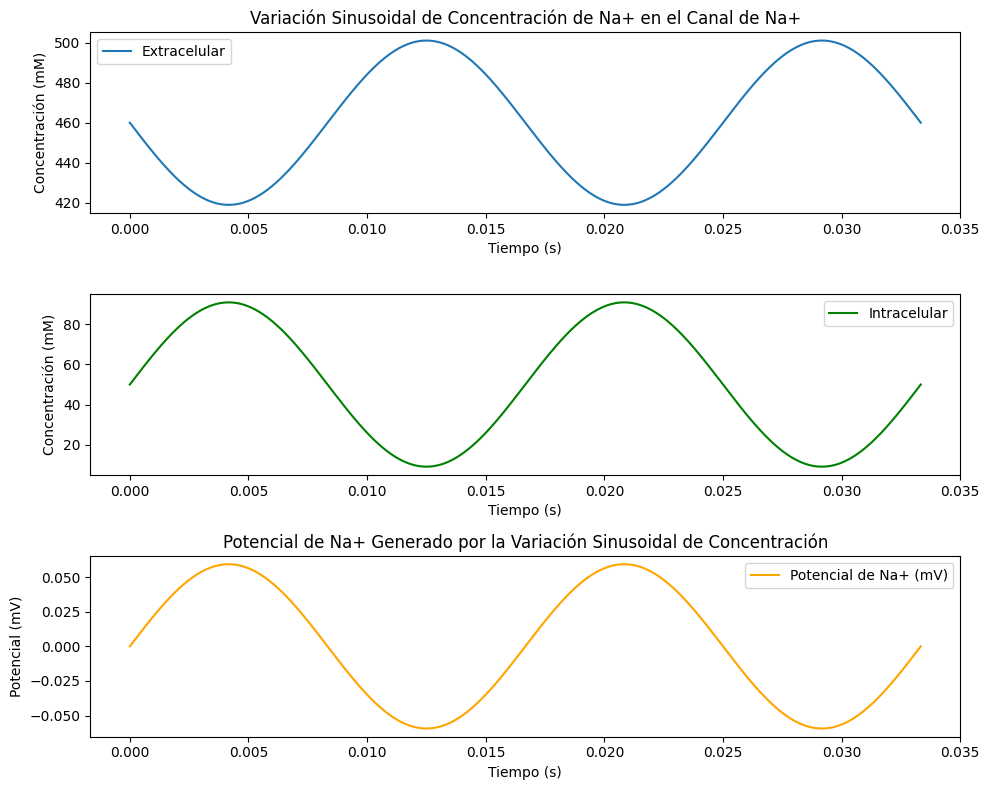

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes y parámetros
R = 8.314     # Constante de los gases en J/(mol*K)
T = 310.15    # 37°C en Kelvin
F = 96485     # Constante de Faraday en C/mol
Na_in = 50    # Valor obtenido de la tabla (Na+)
Na_out = 460  # Valor obtenido de la tabla (Na+)
Na_z = 1  # Valencia del ion Na+

# Cálculo de ENA (potencial de equilibrio del ion sodio)
ENA = -((R * T) / (Na_z * F)) * np.log(Na_in / Na_out)

# Parámetros para la onda sinusoidal
f = 60  # frecuencia en Hz
T_wave = 1 / f  # periodo de la onda
t = np.linspace(0, 2*T_wave, 1000)  # vector de tiempo para dos periodos de onda

# Generar la onda sinusoidal
Vin = np.sin(2 * np.pi * f * t)
# Ajustar la amplitud de la onda para que oscile entre el 90% y el 110% del valor mínimo de concentración de sodio
Na_variation = Na_out + 0.1 * (Na_in - Na_out) * Vin

# Concentración intracelular de sodio
Na_intra_variation = Na_in - 0.1 * (Na_in - Na_out) * Vin

# Cálculo del potencial de sodio a partir de la variación sinusoidal
VNa = ENA * Vin

# Gráfico de la variación sinusoidal de concentración de sodio y el potencial de sodio
plt.figure(figsize=(10, 8))

plt.subplot(3, 1, 1)
plt.plot(t, Na_variation, label='Extracelular')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mM)')
plt.title('Variación Sinusoidal de Concentración de Na+ en el Canal de Na+')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, Na_intra_variation, label='Intracelular', color='green')
plt.xlabel('Tiempo (s)')
plt.ylabel('Concentración (mM)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, VNa, label='Potencial de Na+ (mV)', color='orange')
plt.xlabel('Tiempo (s)')
plt.ylabel('Potencial (mV)')
plt.title('Potencial de Na+ Generado por la Variación Sinusoidal de Concentración')
plt.legend()

plt.tight_layout()
plt.show()